In [3]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import os
from tensorflow import keras
from sklearn.metrics import f1_score, classification_report



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:


base_dir = '/content/drive/MyDrive/Potato model/data'

img_size = 224
batch = 64


In [6]:
# Create a data augmentor
train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2,
								zoom_range=0.2, horizontal_flip=True,
								validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1. / 255,
								validation_split=0.2)

# Create datasets
train_datagen = train_datagen.flow_from_directory(base_dir,
												target_size=(
													img_size, img_size),
												subset='training',
												batch_size=batch)
test_datagen = test_datagen.flow_from_directory(base_dir,
												target_size=(
													img_size, img_size),
												subset='validation',
												batch_size=batch)


Found 240 images belonging to 3 classes.
Found 59 images belonging to 3 classes.


In [7]:
model = Sequential()

# First Convolutional Block
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same',
                 activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Block
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Third Convolutional Block
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Fourth Convolutional Block
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Fully Connected Layers
model.add(Flatten())  # Flatten the 3D outputs to 1D
model.add(Dense(512))  # Fully connected layer with 512 neurons
model.add(Activation('relu'))  # ReLU activation function

# Output Layer
model.add(Dense(3, activation="softmax"))  # 4 output neurons (for 4 classes)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 64)        │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,540,227 (24.95 MB)

 Trainable params: 6,540,227 (24.95 MB)

 Non-trainable params: 0 (0.00 B)

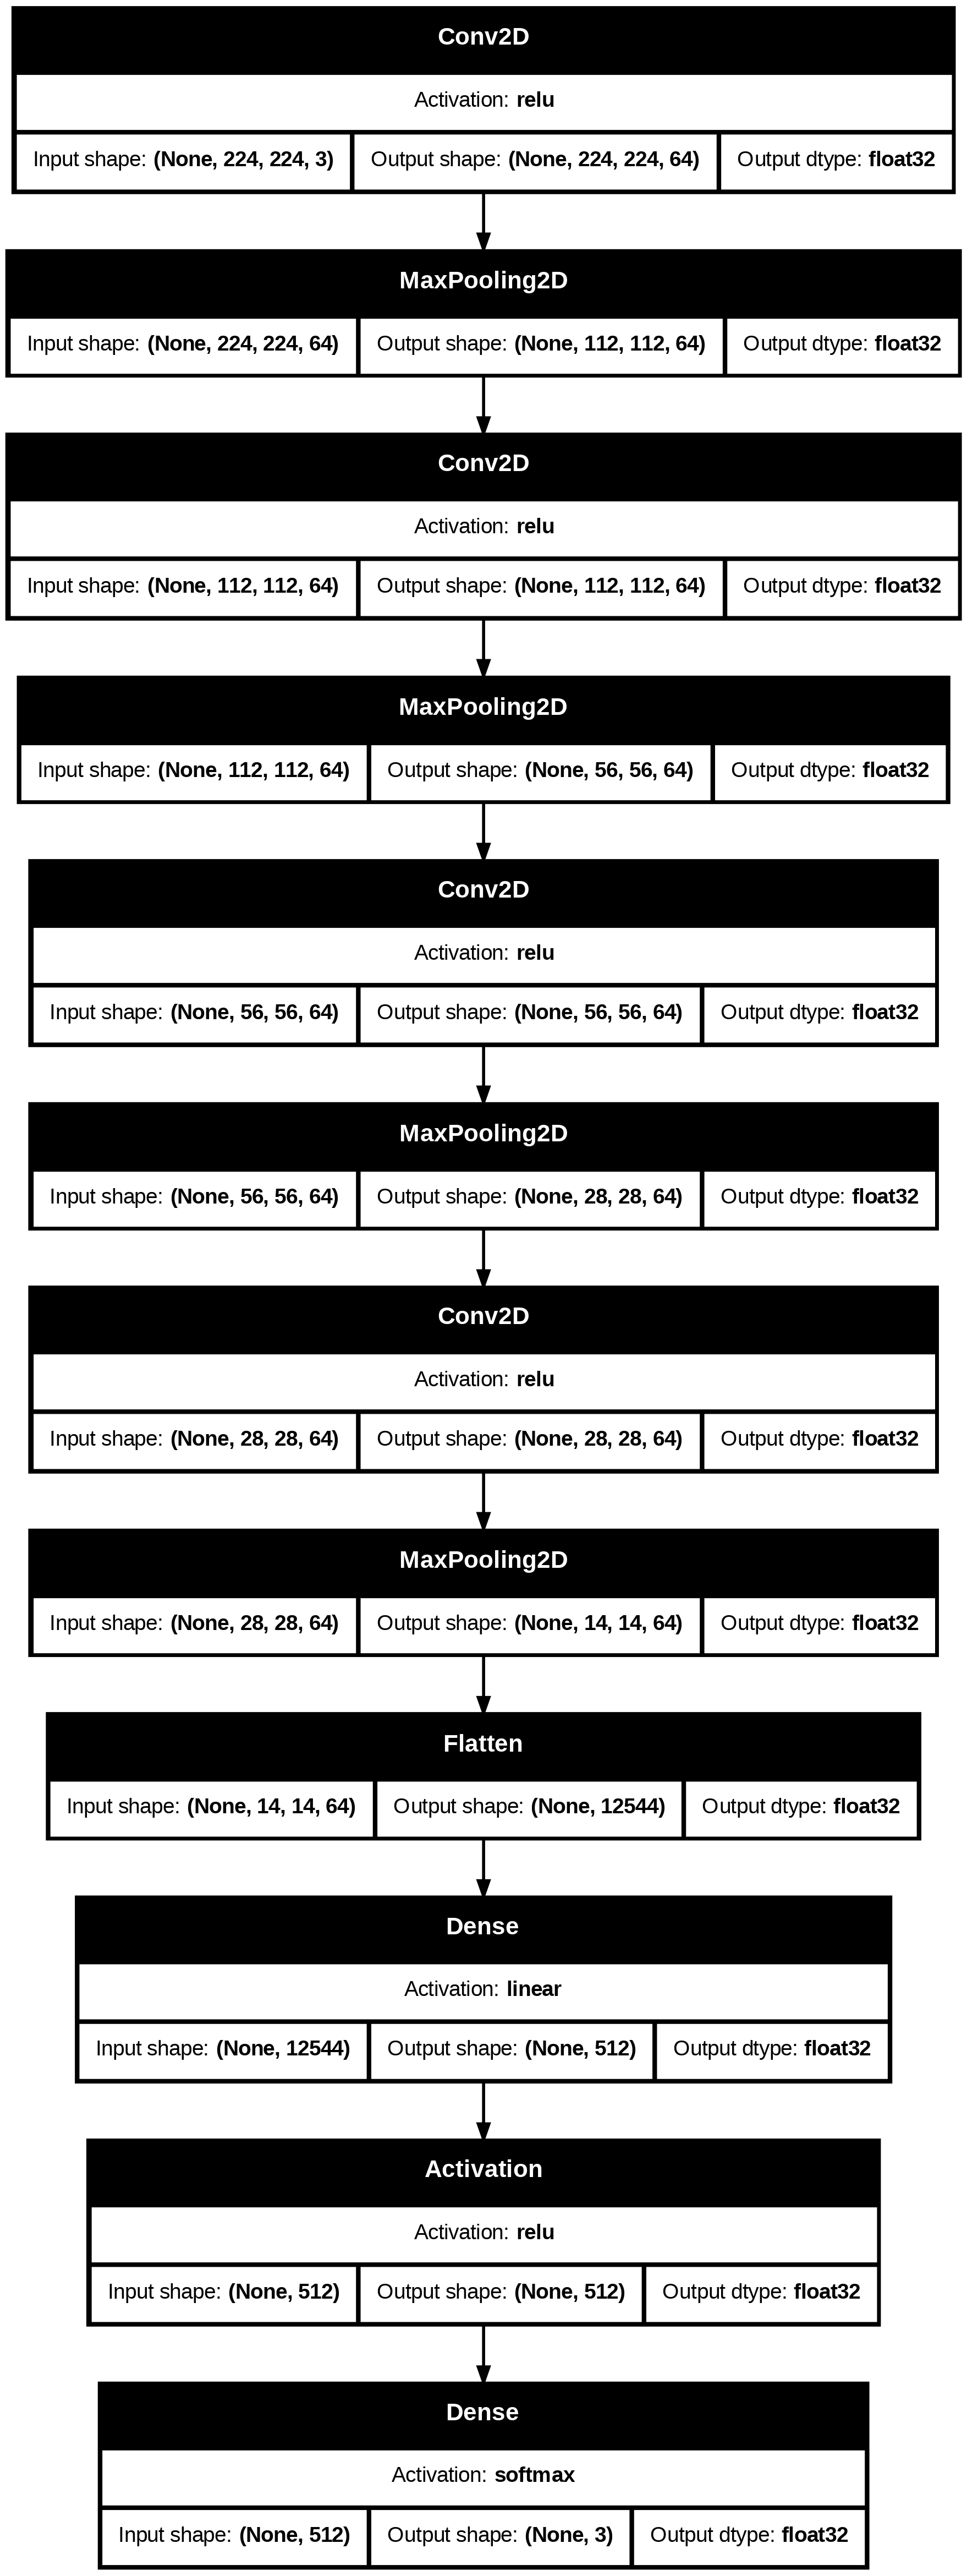

In [ ]:
keras.utils.plot_model(
	model,
	show_shapes = True,
	show_dtype = True,
	show_layer_activations = True
)


In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [9]:
epochs=30
model.fit(train_datagen,epochs=epochs,validation_data=test_datagen)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 48s 9s/step - accuracy: 0.3160 - loss: 1.2975 - val_accuracy: 0.3220 - val_loss: 1.1008
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 917ms/step - accuracy: 0.3443 - loss: 1.0977 - val_accuracy: 0.3390 - val_loss: 1.0986
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.3536 - loss: 1.0972 - val_accuracy: 0.6271 - val_loss: 1.0759
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 900ms/step - accuracy: 0.5137 - loss: 1.0746 - val_accuracy: 0.6441 - val_loss: 1.0341
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 910ms/step - accuracy: 0.5168 - loss: 1.0301 - val_accuracy: 0.5763 - val_loss: 0.9552
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5359 - loss: 0.9623 - val_accuracy: 0.6271 - val_loss: 0.8323
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 872ms/step - accuracy: 0.6549 - loss: 0.7709 - val_accuracy: 0.6780 - val_loss: 0.6989
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 995ms/step - accuracy: 0.7325 - loss: 0.5683 - val_accuracy: 0.6271 - val_loss: 0.8205


In [10]:
print(train_datagen.class_indices)


{'Healthy': 0, 'Potato_Leate_blight': 1, 'Potato___Early_blight': 2}


In [11]:
import os
from tensorflow.keras.models import load_model


model_path = os.path.join('/content/drive/MyDrive/skin_disease', 'Model.h5')

# Save the model
model.save(model_path)

# Load the model
savedModel = load_model(model_path)

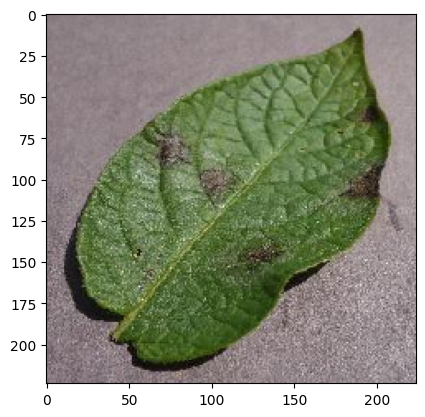

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 794ms/step
Prediction probabilities: [[0. 1. 0.]]
Predicted Class: Potato_Late_blight


In [12]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os # Import os to check file existence
from tensorflow.keras.models import load_model

list_ = ['Healthy', 'Potato_Late_blight', 'Potato___Early_blight',]

# Input image
test_image = image.load_img('/content/drive/MyDrive/Potato model/Potato_Late_blight.test/ff03a125-445b-40e1-a7ed-0bb9b155dfd8___RS_LB 5039.JPG', target_size=(224,224))
# Show image
plt.imshow(test_image)
plt.show()

# Preprocess the image
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Predict using the loaded model (if loaded successfully)
if savedModel is not None:
    result = savedModel.predict(test_image)
    print("Prediction probabilities:", result)

    # Find the class with the highest probability
    predicted_class_index = np.argmax(result[0])
    predicted_class = list_[predicted_class_index]
    print("Predicted Class:", predicted_class)

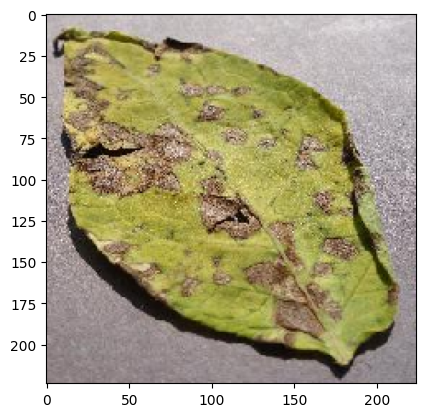

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Prediction probabilities: [[0. 0. 1.]]
Predicted Class: Potato___Early_blight


In [15]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os # Import os to check file existence
from tensorflow.keras.models import load_model

list_ = ['Healthy', 'Potato_Late_blight', 'Potato___Early_blight',]

# Input image
test_image = image.load_img('/content/drive/MyDrive/Potato model/Potato_Early_blight.test/fe24f700-d37f-4e51-b07c-931e8c3ded81___RS_Early.B 8792.JPG', target_size=(224,224))
# Show image
plt.imshow(test_image)
plt.show()

# Preprocess the image
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Predict using the loaded model (if loaded successfully)
if savedModel is not None:
    result = savedModel.predict(test_image)
    print("Prediction probabilities:", result)

    # Find the class with the highest probability
    predicted_class_index = np.argmax(result[0])
    predicted_class = list_[predicted_class_index]
    print("Predicted Class:", predicted_class)

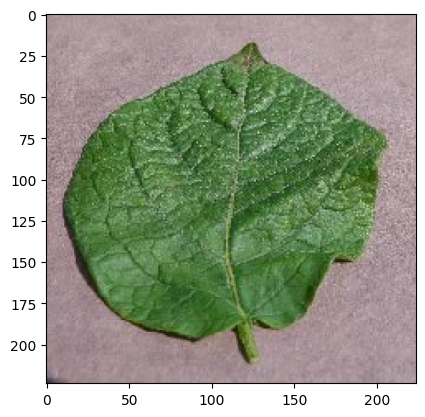

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prediction probabilities: [[1. 0. 0.]]
Predicted Class: Healthy


In [16]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os # Import os to check file existence
from tensorflow.keras.models import load_model

list_ = ['Healthy', 'Potato_Late_blight', 'Potato___Early_blight',]

# Input image
test_image = image.load_img('/content/drive/MyDrive/Potato model/Healthy.test/f66af6c0-6fc6-4020-b1de-a73685d497c2___RS_HL 4181.JPG', target_size=(224,224))
# Show image
plt.imshow(test_image)
plt.show()

# Preprocess the image
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Predict using the loaded model (if loaded successfully)
if savedModel is not None:
    result = savedModel.predict(test_image)
    print("Prediction probabilities:", result)

    # Find the class with the highest probability
    predicted_class_index = np.argmax(result[0])
    predicted_class = list_[predicted_class_index]
    print("Predicted Class:", predicted_class)

In [21]:
from sklearn.metrics import f1_score, classification_report
model = Sequential()

# Convolutional Blocks
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))

# Output Layer (3 neurons for 3 classes)
model.add(Dense(3, activation="softmax"))  # Matches {'Healthy':0, 'Potato_Late_blight':1, 'Potato_Early_blight':2}

# Compile the model (required before prediction)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Assuming you have test data (replace with your actual test generator)
# y_true = test_datagen.classes
# y_pred = model.predict(test_datagen)
# y_pred = np.argmax(y_pred, axis=1)

# For demonstration, let's simulate test data (replace with your actual data)
num_samples = 100
y_true = np.random.randint(0, 3, num_samples)  # Random true labels (0, 1, 2)
y_pred = np.random.randint(0, 3, num_samples)  # Random predictions (0, 1, 2)

# Compute F1 Scores
f1_micro = f1_score(y_true, y_pred, average='micro')
f1_macro = f1_score(y_true, y_pred, average='macro')
f1_weighted = f1_score(y_true, y_pred, average='weighted')
f1_per_class = f1_score(y_true, y_pred, average=None)

# Print Results
class_names = ['Healthy', 'Potato_Late_blight', 'Potato_Early_blight']
print("\n=== F1 Scores ===")
print(f"Micro F1 (Global): {f1_micro:.4f}")
print(f"Macro F1 (Class-Avg): {f1_macro:.4f}")
print(f"Weighted F1 (Support-Adjusted): {f1_weighted:.4f}\n")

print("Per-Class F1 Scores:")
for name, score in zip(class_names, f1_per_class):
    print(f"{name}: {score:.4f}")

print("\n=== Classification Report ===")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))


=== F1 Scores ===
Micro F1 (Global): 0.3900
Macro F1 (Class-Avg): 0.3839
Weighted F1 (Support-Adjusted): 0.3897

Per-Class F1 Scores:
Healthy: 0.3214
Potato_Late_blight: 0.4068
Potato_Early_blight: 0.4235

=== Classification Report ===
                     precision    recall  f1-score   support

            Healthy     0.3214    0.3214    0.3214        28
 Potato_Late_blight     0.4286    0.3871    0.4068        31
Potato_Early_blight     0.4091    0.4390    0.4235        41

           accuracy                         0.3900       100
          macro avg     0.3864    0.3825    0.3839       100
       weighted avg     0.3906    0.3900    0.3897       100



In [ ]:

epochs = 30

history = model.fit(train_datagen,
                    epochs=epochs,
                    validation_data=test_datagen)

# Plot Training & Validation Metrics
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot Training & Validation Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/30
2/4 ━━━━━━━━━━━━━━━━━━━━ 1s 858ms/step - accuracy: 0.9883 - loss: 0.0436

KeyboardInterrupt: 